<a href="https://colab.research.google.com/github/bharadwaj240796/cs666student/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

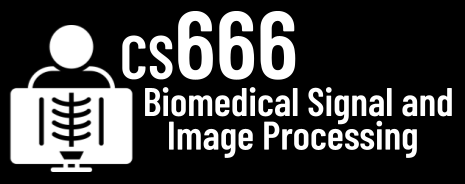
#Assignment 4

In [ ]:
# NAME: Bharadwaj Nidumolu

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia and covid in xrays!

In [2]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# we are using mahotas again, so lets install it!
!pip install mahotas --no-binary :all:

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Skipping wheel build for mahotas, due to binaries being disabled for it.
  Running setup.py install for mahotas ... done


In [4]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs666.org/data/xray/
# This is a subset of the Kaggle Pneumonia + Covid Datasets!
#
# TODO: Upload xray.zip using the file panel on the left.

In [6]:
# Run this code to extract the zip file and to create
# the folder structure of normal/, pneumonia/, and covid/ images.
# Each folder contains the first images of the Kaggle datasets.
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'
COVID_DIR = 'covid/'

In [7]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!

In [ ]:
# TODO: YOUR CODE

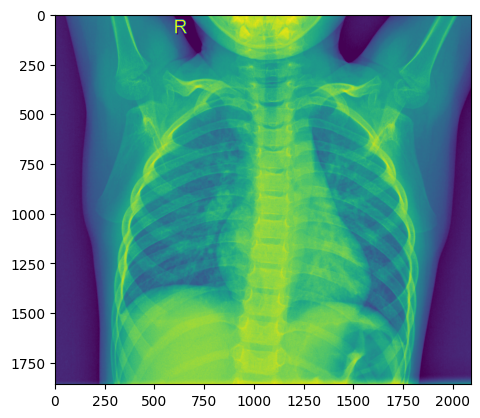

In [8]:
imshow(img)

In [9]:
print("Image Dimension : ",img.shape)

Image Dimension :  (1858, 2090)


**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [10]:
folders = [NORMAL_DIR, PNEUMONIA_DIR, COVID_DIR]
data = [[],[],[]]

for f_index,f in enumerate( folders ):
  all_files = os.listdir( f )

  data[f_index] = np.zeros( (len(all_files), 300, 300), dtype=np.float32)

  for i in range(len(all_files)):
    loaded_image = mh.imread( f + '/' + all_files[i] )
    if loaded_image.ndim > 2:
      loaded_image = mh.colors.rgb2gray(loaded_image[:,:,:3])

    loaded_image = mh.imresize( loaded_image, (300, 300) )
    img_shape = loaded_image.shape

    data[f_index][ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# The two code blocks above perform 3 data wrangling operations.
# Which ones?
# Hint: The first two might be more obvious but the third one happens in the
# last line.
# TODO: Operation 1) YOUR ANSWER
# TODO: Operation 2) YOUR ANSWER
# TODO: Operation 3) YOUR ANSWER

Operation 1 : Extracting all file present in all folders ( Normal_Dir,Pneumonia_Dir,Covid_Dir ).
</br></br>
Operation 2 : Using Iteration, traversing over files and selecting images for which ndim > 2 and the selected images are converted RGB to GRAY. Finally, the gray images are resize to 300 x 300.
</br></br>
Operation 3 : At starting we created data[f_index] a numpy array with all 0's of float data type and Now we are re-loading gray re-sized image using data[f_index].

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [24]:
# TODO: YOUR CODE
print("Lenght of Normal : ",len(data[0]))
print("Lenght of Pnuemonia  : ",len(data[1]))
print("Lenght of Covid  : ",len(data[2]))

Lenght of Normal :  100
Lenght of Pnuemonia  :  100
Lenght of Covid  :  199


NORMAL IMAGES


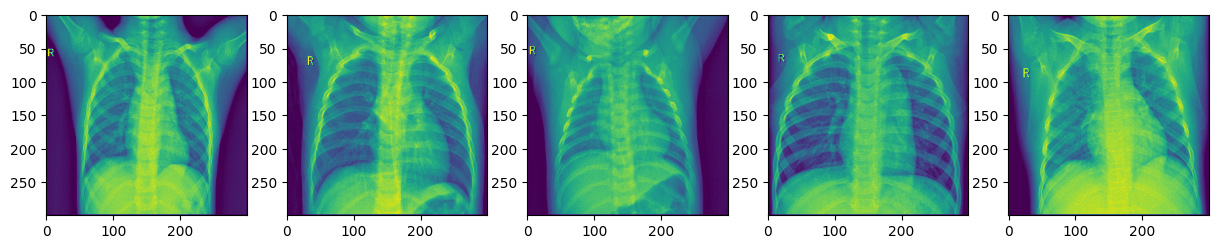

In [14]:
print("NORMAL IMAGES")
import matplotlib.pyplot as plt

v_slice = [] 
for i in range(0,5):
    image = data[0][i]
    v_slice.append(image)


f, axarr = plt.subplots(1,5, figsize=(15, 6))

for i in range(5):
  axarr[i].imshow(v_slice[i])

PNeummonia IMAGES


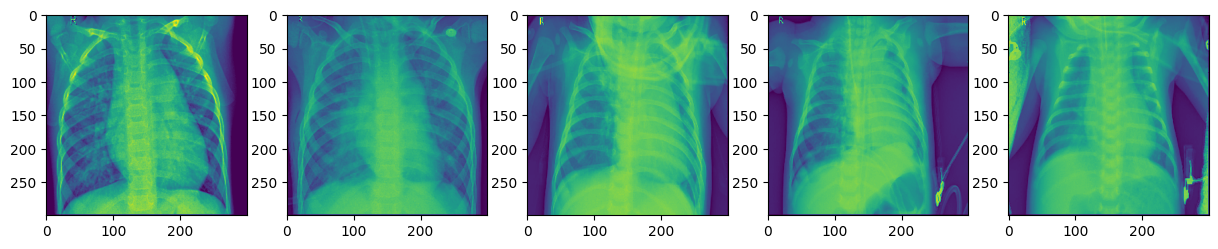

In [15]:
print("PNeummonia IMAGES")
import matplotlib.pyplot as plt

v_slice = [] 
for i in range(0,5):
    image = data[1][i]
    v_slice.append(image)


f, axarr = plt.subplots(1,5, figsize=(15, 6))

for i in range(5):
  axarr[i].imshow(v_slice[i])

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays, pneumonia xrays, and covid xrays.
#
# The training data X_train will include 180 images (60 normal, 60 pneumonia, 60 covid).
# The testing data X_test will include the remaining 120 images (40 normal, 40 pneumonia, 40 covid).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the y_train vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia, and 2 for a covid scan.

In [16]:
TRAINING_COUNT = 60

X_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TRAINING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_train[t_pos] = image
    t_pos += 1

In [17]:
# TODO: Please create the y_train vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
y_train = np.zeros( (TRAINING_COUNT * 3, 300*300 ), dtype=np.float32)

In [18]:
TESTING_COUNT = 40

X_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)
t_pos = 0

for d in data:
  for image in d[0:TESTING_COUNT]:
    image = image.ravel() # flatten the image
    image /= image.max() # normalize the image
    X_test[t_pos] = image
    t_pos += 1

In [19]:
# TODO: Please create the y_test vector with 0 for a normal image, 
# 1 for a pneumonia, and 2 for covid. This needs to a numpy array.
y_test = np.zeros( (TESTING_COUNT * 3, 300*300 ), dtype=np.float32)

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [20]:
# Let's shuffle our training data.
p = np.random.permutation(len(X_train))
X_train = X_train[p]
y_train = y_train[p]

In [21]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [22]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia or covid.
fitted = clf.fit( X_train, y_train )

In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# TODO: YOUR ANSWER

It builds decision trees on different samples,each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

In [23]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( X_test, y_test )

1.0

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [ ]:
# TODO: YOUR ANSWER

Yes, the classification accuracy is good</br></br> and Yeah, I'm surprised.

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Let's run the fitted classifier on the remaining covid images.
# You might have noticed that there are 199 covid images but we only used 100 so far.
# Please evaluate the classifier on the remaining (previously unseen) 99 covid images
# and check the performance.

In [48]:
# TODO: YOUR CODE AND YOUR ANSWER
covid_images = data[2]
covid_remaining_images = covid_images[100:]
print(len(covid_images))
print(len(covid_remaining_images))

TRAINING_COUNT_REMAIN = 99

X_train_remain = np.zeros( (TRAINING_COUNT_REMAIN , 300*300 ), dtype=np.float32)
train_pos = 0

for d in covid_remaining_images:
  image = image.ravel() 
  image /= image.max() 
  X_train_remain[train_pos] = image
  train_pos += 1

print(X_train_ramain)

y_train_remain = np.zeros( (TRAINING_COUNT_REMAIN , 300*300 ), dtype=np.float32)
print(y_train)

TESTING_COUNT_REMAIN = 40

X_test_remain = np.zeros( (TESTING_COUNT_REMAIN , 300*300 ), dtype=np.float32)
test_pos = 0
print(X_test_remain)

for d in covid_remaining_images[0:TESTING_COUNT_REMAIN]:
  image = image.ravel() 
  image /= image.max() 
  X_test_remain[test_pos] = image
  test_pos += 1

y_test_remain = np.zeros( (TESTING_COUNT , 300*300 ), dtype=np.float32)
print(y_test_remain)

p = np.random.permutation(len(X_train_remain))
X_train_remain = X_train_remain[p]
y_train_remain = y_train_remain[p]

fitted = clf.fit( X_train_remain, y_train_remain )

print("Accuracy : ",clf.score( X_test_remain, y_test_remain ))


199
99
[[-3.0476712e-17 -3.2653618e-18  6.1225537e-20 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 6.9411767e-01  6.3921571e-01  6.3921571e-01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 4.0784314e-01  2.2352941e-01  2.5882354e-01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 7.8823531e-01  7.3333335e-01  7.2156864e-01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-4.5413838e-26  2.6573584e-23 -1.0204256e-20 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 6.4313728e-01  6.3137257e-01  5.5294120e-01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw